In this notebook I am going to predict if a bank note is true or false based on 7 different measurements. There are five measurements:

- length: the length of the banknote in mm
- height left: the height of the left side of the banknote in mm
- height right: the height  of the right side of the bank note in mm
- diagonal: the diagonal of the bank note in mm
- margin low: lower side margin in mm
- margin up: upper side margin in mm

The last column is_genuine is the target

In [ ]:
# 1.2 Loading Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [ ]:
data = pd.read_csv('/content/fake_bills.csv', sep=';')
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
data.shape

(1500, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [ ]:
data.is_genuine.value_counts(normalize=True)

True     0.666667
False    0.333333
Name: is_genuine, dtype: float64

<Axes: xlabel='is_genuine', ylabel='count'>

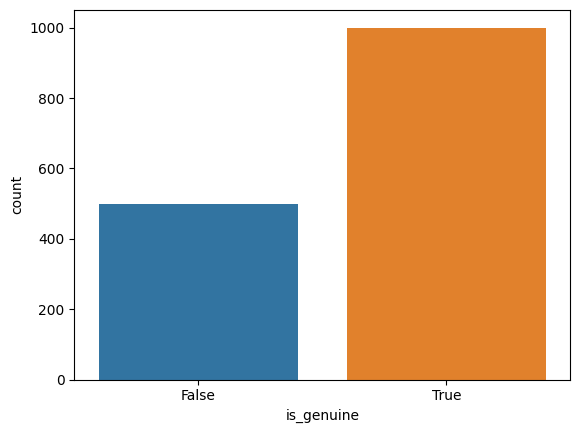

In [ ]:
sns.countplot(data=data, x='is_genuine')

In [ ]:
#Converting is_genuine column to int
data['is_genuine'] = data['is_genuine'].astype(int)

In [ ]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
# looking for any null values
data.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [ ]:
#looking for specific null values in margin_low column
data[data.margin_low.isna()]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1,171.94,103.89,103.45,NaN,3.25,112.79
99,1,171.93,104.07,104.18,NaN,3.14,113.08
151,1,172.07,103.80,104.38,NaN,3.02,112.93
197,1,171.45,103.66,103.80,NaN,3.62,113.27
241,1,171.83,104.14,104.06,NaN,3.02,112.36
251,1,171.80,103.26,102.82,NaN,2.95,113.22
284,1,171.92,103.83,103.76,NaN,3.23,113.29
334,1,171.85,103.70,103.96,NaN,3.00,113.36
410,1,172.56,103.72,103.51,NaN,3.12,112.95
413,1,172.30,103.66,103.50,NaN,3.16,112.95


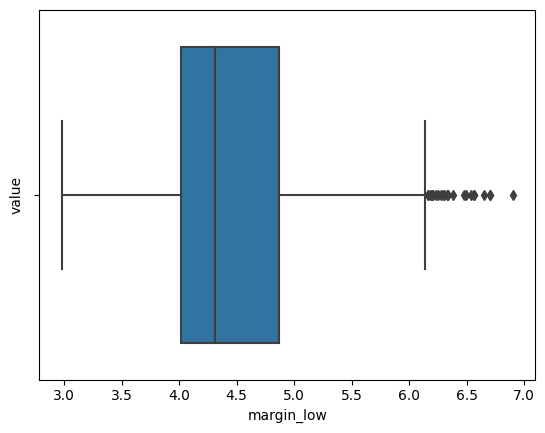

In [ ]:
sns.boxplot(x = data['margin_low'])
plt.xlabel('margin_low')
plt.ylabel('value')
plt.show()

There are a couple of outliers in this column so I will use the median in place of the missing data.

In [ ]:
med_ml = data['margin_low'].median()
data['margin_low'].fillna(med_ml, axis = 0, inplace = True)

In [ ]:
data["margin_low"].isnull().sum()

0

<Axes: >

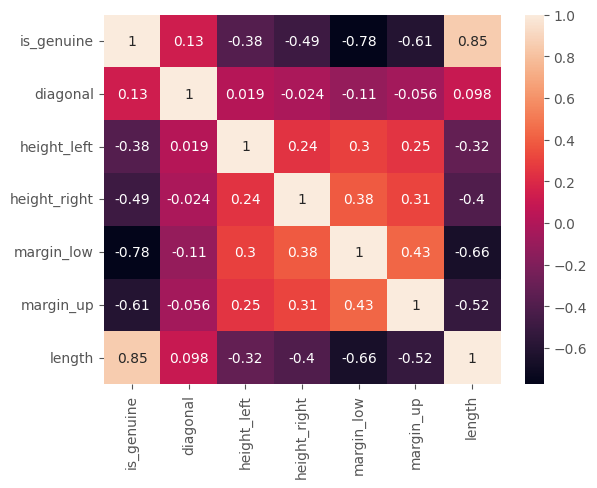

In [ ]:
sns.heatmap(data.corr(), annot=True)

The 'margin_low' and 'length' shows a strong correlation with our dependent variable (is_genuine)

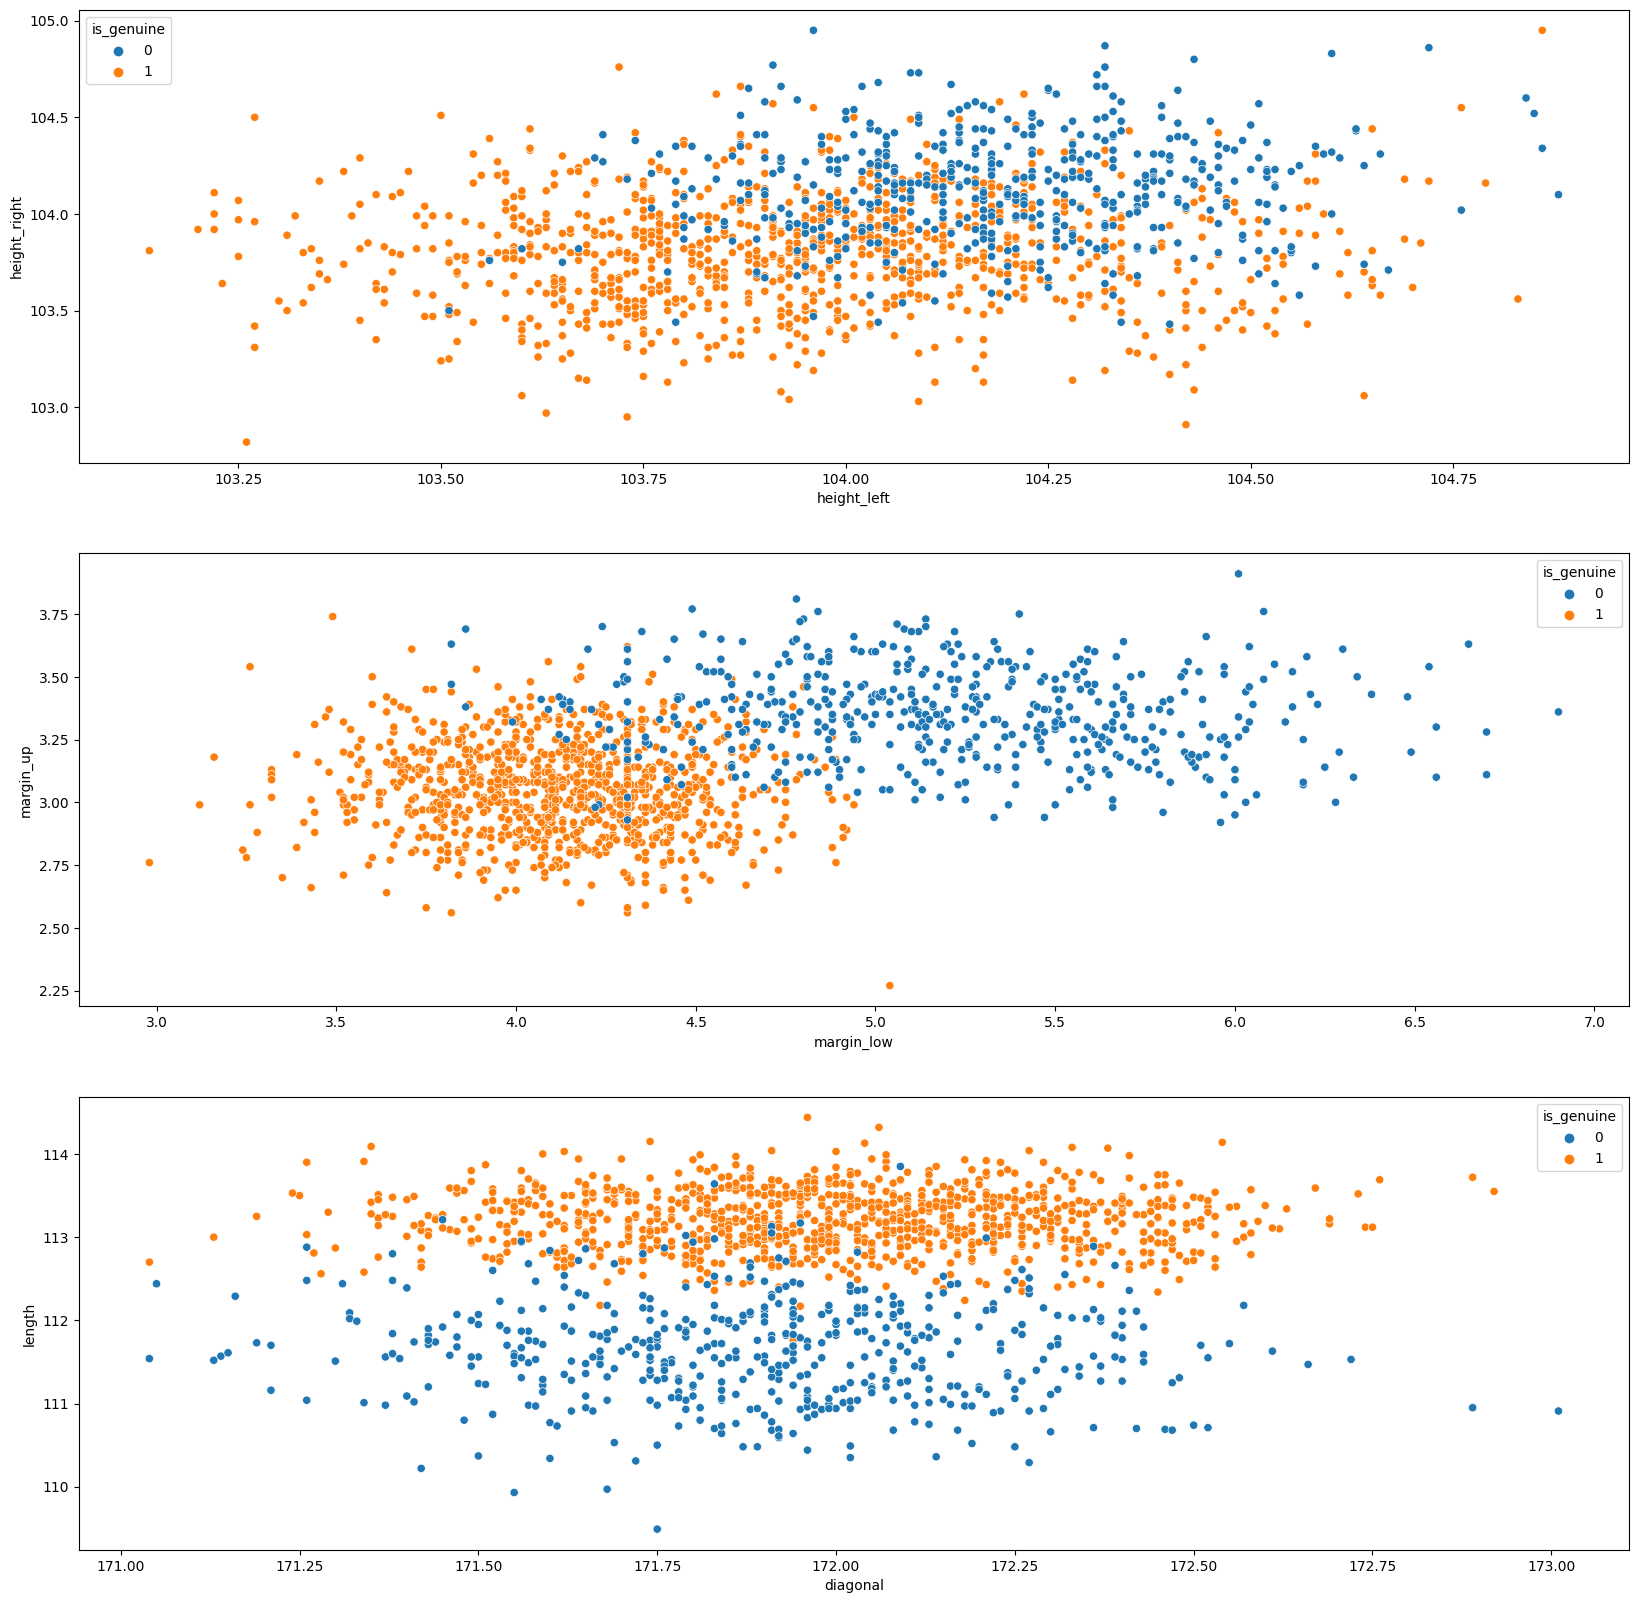

In [ ]:
def scatter(x,y,n):
    plt.subplot(3,1,n)
    sns.scatterplot(data=data,x=x,y=y,hue=data["is_genuine"])
    plt.xlabel(x)
    plt.ylabel(y)

plt.figure(figsize=(20,20))
scatter("height_left","height_right",1)
scatter("margin_low","margin_up",2)
scatter("diagonal","length",3)

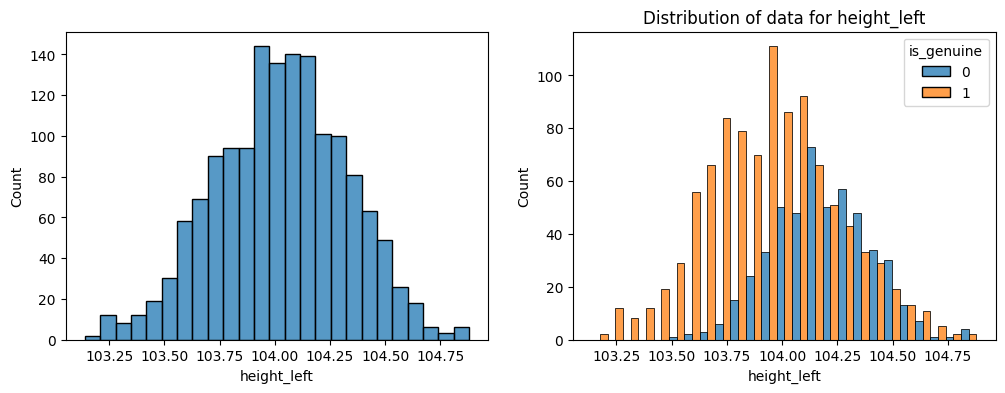

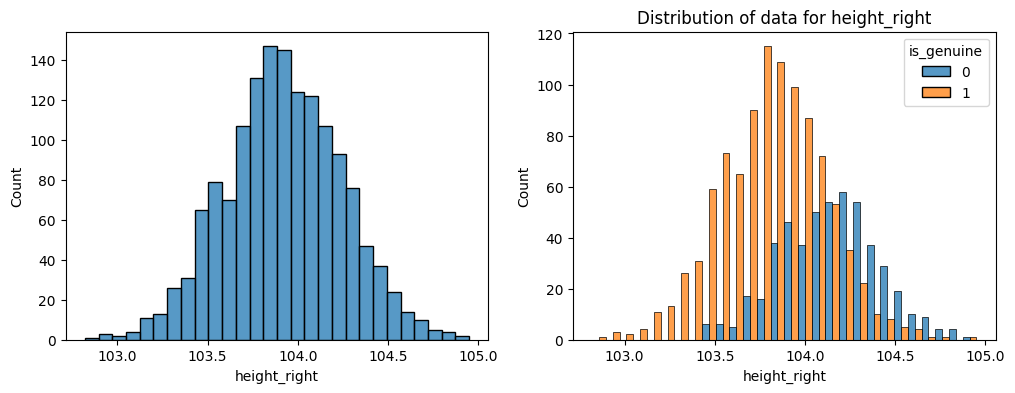

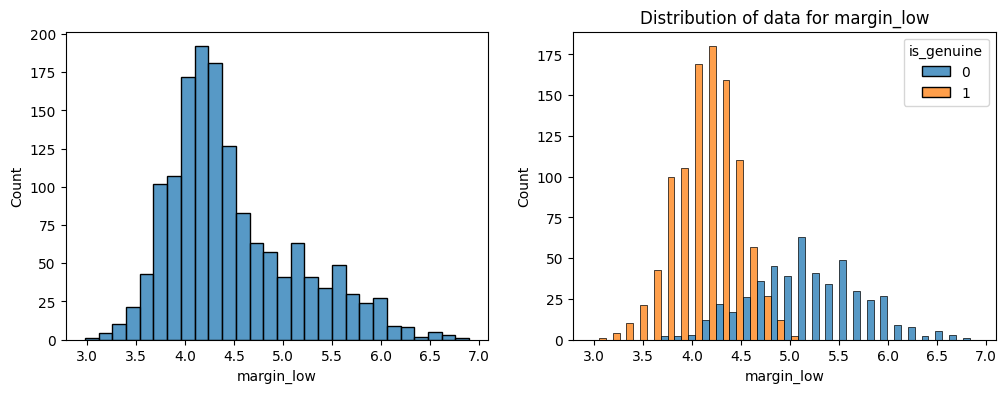

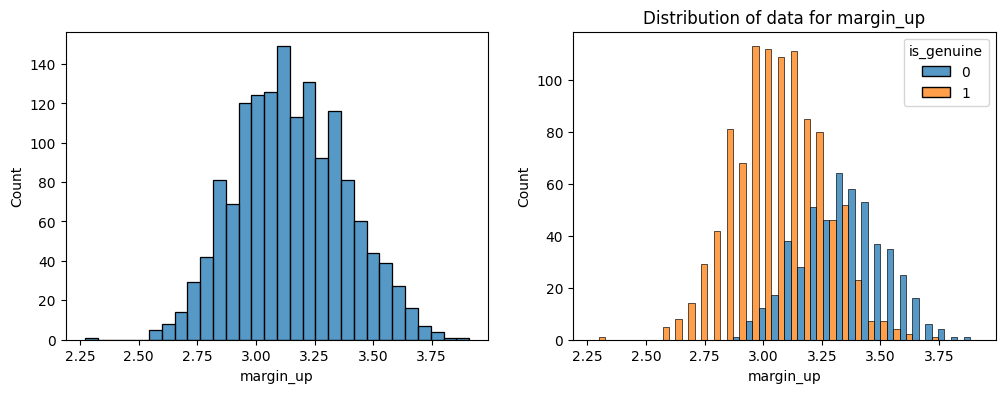

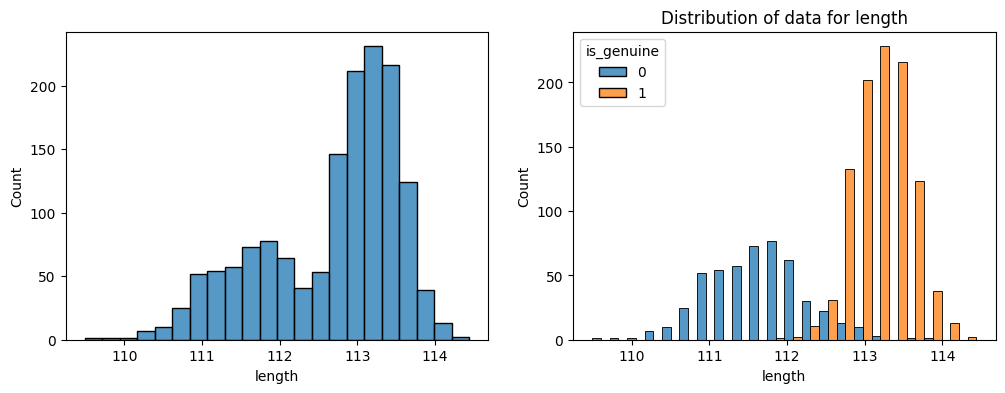

In [ ]:
for col in data.columns[2:]:
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    sns.histplot(data=data, x=col, ax=ax[0])
    sns.histplot(data=data, x=col, hue='is_genuine', ax=ax[1], multiple='dodge')
    plt.title(f"Distribution of data for {col}")
    plt.show()

In [ ]:
data.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.481627,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.656137,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.030000,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.860000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [ ]:
X=data.drop("is_genuine",axis=1)
y=data["is_genuine"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42,stratify=y)

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
score = log_reg.score(X_test, y_test)
acc = accuracy_score(y_test, y_pred)
f_1 = f1_score(y_test, y_pred)
re_score = recall_score(y_test, y_pred)
pre_score = precision_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(score)
print(acc)
print(f_1)
print(re_score)
print(pre_score)
print(cm)

0.9866666666666667
0.9866666666666667
0.9900497512437811
0.995
0.9851485148514851
[[ 97   3]
 [  1 199]]


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
logm=sm.Logit(y_train, X_train).fit()
print(logm.summary())

Optimization terminated successfully.
         Current function value: 0.026812
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1194
Method:                           MLE   Df Model:                            5
Date:                Thu, 05 Oct 2023   Pseudo R-squ.:                  0.9579
Time:                        17:55:04   Log-Likelihood:                -32.175
converged:                       True   LL-Null:                       -763.82
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
diagonal        -1.1773      0.872     -1.350      0.177      -2.886       0.532
height_left     -1.271

In [ ]:
X_train_1 = X_train.drop(["diagonal", "height_left"],axis=1)


In [ ]:
logm_1=sm.Logit(y_train, X_train_1).fit()
print(logm_1.summary())

Optimization terminated successfully.
         Current function value: 0.028947
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1196
Method:                           MLE   Df Model:                            3
Date:                Thu, 05 Oct 2023   Pseudo R-squ.:                  0.9545
Time:                        17:55:19   Log-Likelihood:                -34.737
converged:                       True   LL-Null:                       -763.82
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
height_right    -5.4365      0.844     -6.440      0.000      -7.091      -3.782
margin_low      -6.198

In [ ]:
data_1 = data.drop("diagonal",axis=1)
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

In [ ]:
data_2 = data_1.drop("is_genuine", axis = 1)
calculate_vif(sm.add_constant(data_2))

,Variable,VIF
0,const,311477.932531
1,height_left,1.152691
2,height_right,1.257163
3,margin_low,1.864982
4,margin_up,1.418499
5,length,2.103559


In [ ]:
log_reg_1=LogisticRegression()
X_test_1 = X_test.drop("diagonal", axis = 1)
log_reg_1.fit(X_train_1,y_train)

LogisticRegression()

In [ ]:
y_pred_1 = log_reg_1.predict(X_test_1)

ValueError: ignored

In [ ]:
score = log_reg.score(X_test_1, y_test)
acc = accuracy_score(y_test, y_pred)
r_2 = r2_score(y_test, y_pred)
re_score = recall_score(y_test, y_pred)
pre_score = precision_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

ValueError: ignored

In [ ]:
print(score)
print(acc)
print(r_2)
print(re_score)
print(pre_score)
print(cm)

0.99
0.99
0.955
0.995
0.9900497512437811
[[ 98   2]
 [  1 199]]
